## Analysis on acute lower respiratory infections

Team: Runtime Terrors

Members:    
> Vinu Prasad Bhambore (vpb2)

> Srijith Srinath (ssrina2)

> Dhruman Jayesh Shah (djshah5)

##### Notebook Update 6 - 03/27/2020

In this update, we are treating the filtered WHO Mortality data (including only the data for Bronchitis and Tuberculosis, along with death rate) as a Time Series to see the temporal effects and trends. This is to verify if moving forward, we can build a Time-Series Forecasting model or not.

The tasks we are doing in the following notebook are as follows:

1. Convert the dataset into Time-Series
2. Check Auto-correlation for the death rate variable
3. Check if the data needs differencing to make it stationary (Augmented Dickey–Fuller test)

In [1]:
#Importing necessary packages

import numpy as np
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt
from statsmodels.compat.pandas import Appender
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller #Fuller test for stationary check

In [2]:
df = pd.read_csv("Indicators_1.csv", index_col="MortalityYear", parse_dates=['MortalityYear']) #importing data
print("Columns:\n", df.dtypes)
print("\nShape: ", df.shape) #Size of the dataset
df.head(5)

Columns:
 CountryName            object
ICD10                  object
Class                  object
Zone                   object
Deaths                  int64
Population            float64
Deaths(per_100000)    float64
dtype: object

Shape:  (3023, 7)


,CountryName,ICD10,Class,Zone,Deaths,Population,Deaths(per_100000)
MortalityYear,,,,,,,
1997-01-01,Antigua and Barbuda,J20,Bronchitis,Caribbean,1,71704.0,1.39
1998-01-01,Antigua and Barbuda,J42,Bronchitis,Caribbean,1,73224.0,1.37
2005-01-01,Antigua and Barbuda,J20,Bronchitis,Caribbean,1,81465.0,1.23
2012-01-01,Antigua and Barbuda,J42,Bronchitis,Caribbean,1,90409.0,1.11
2016-01-01,Antigua and Barbuda,J40,Bronchitis,Caribbean,1,94527.0,1.06


In [3]:
bronchitis = df[df["Class"] == 'Bronchitis']
print("\nBronchitis df: ", bronchitis.shape) #Size of the dataset
bronchitis.head(2)


Bronchitis df:  (1631, 7)


,CountryName,ICD10,Class,Zone,Deaths,Population,Deaths(per_100000)
MortalityYear,,,,,,,
1997-01-01,Antigua and Barbuda,J20,Bronchitis,Caribbean,1,71704.0,1.39
1998-01-01,Antigua and Barbuda,J42,Bronchitis,Caribbean,1,73224.0,1.37


In [4]:
tuberculosis = df[df["Class"] == 'Tuberculosis']
print("\nTuberculosis df: ", tuberculosis.shape) #Size of the dataset
tuberculosis.head(2)


Tuberculosis df:  (1392, 7)


,CountryName,ICD10,Class,Zone,Deaths,Population,Deaths(per_100000)
MortalityYear,,,,,,,
1997-01-01,Argentina,A15,Tuberculosis,SouthAmerica,24,35657429.0,0.07
1997-01-01,Argentina,A17,Tuberculosis,SouthAmerica,32,35657429.0,0.09


## Bronchitis: Checking at Zone-level

In [5]:
bronchitis.Zone.unique()

array(['Caribbean', 'SouthAmerica', 'CentralAmerica', 'NorthernAmerica'],
      dtype=object)

### Carribbean

In [6]:
br_cari = bronchitis[bronchitis['Zone'] == "Caribbean"]
print("Bronchitis Carribean df: ", br_cari.shape) #Size of the dataset
br_cari = br_cari.drop(['CountryName', 'ICD10', 'Class', 'Zone', 'Population', 'Deaths'], axis = 1)
br_cari = br_cari.groupby(['MortalityYear']).sum()
br_cari = br_cari.rename(columns={"Deaths(per_100000)": "deathRate"})
print(br_cari.info())
br_cari.head(5)

Bronchitis Carribean df:  (365, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 1996-01-01 to 2017-01-01
Data columns (total 1 columns):
deathRate    22 non-null float64
dtypes: float64(1)
memory usage: 352.0 bytes
None


,deathRate
MortalityYear,
1996-01-01,0.97
1997-01-01,2.97
1998-01-01,2.70
1999-01-01,4.54
2000-01-01,15.35


In [7]:
#AdFuller test
result1 = adfuller(br_cari.deathRate.dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

ADF Statistic: -4.026185
p-value: 0.001279


### In this data, p-value is less than significance value (0.05). So the Time Series already appears to be stationary

#### We however will use differencing to see if it makes sense to make the data more stationary


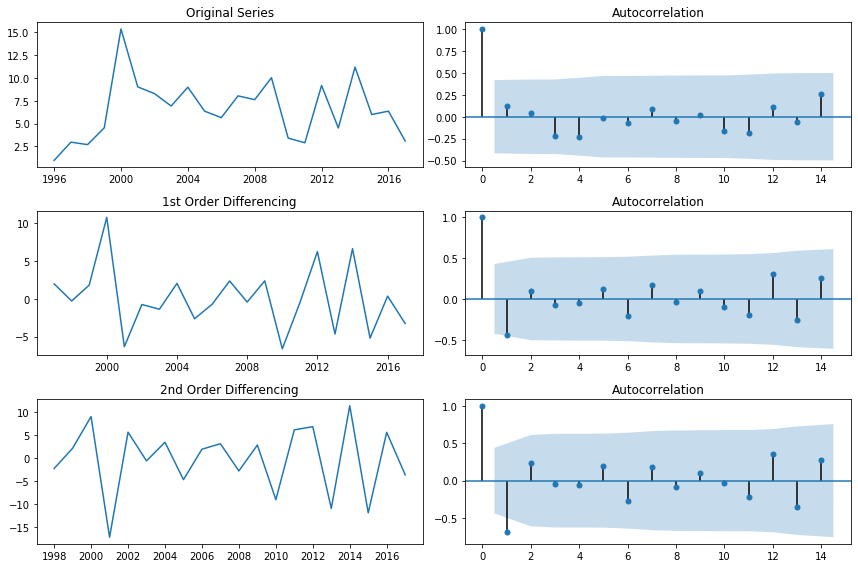

In [8]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes[0,0].plot(br_cari.deathRate); axes[0,0].set_title('Original Series')
x = plot_acf(br_cari.deathRate, axes[0,1]);


# 1st Differencing
axes[1,0].plot(br_cari.deathRate.diff()); axes[1,0].set_title('1st Order Differencing')
y = plot_acf(br_cari.deathRate.diff().dropna(), axes[1,1]);


# 2nd Differencing
axes[2,0].plot(br_cari.deathRate.diff().diff()); axes[2,0].set_title('2nd Order Differencing')
z = plot_acf(br_cari.deathRate.diff().diff().dropna(), axes[2,1])


plt.tight_layout()

#### From the graphs above, we see that the Bronchitis data for Carribbean is stationary even without differencing. So, we will keep it the same.

### North America

In [9]:
br_na = bronchitis[bronchitis['Zone'] == "NorthernAmerica"]
print("Bronchitis Northern America df: ", br_na.shape) #Size of the dataset
br_na = br_na.drop(['CountryName', 'ICD10', 'Class', 'Zone', 'Population', 'Deaths'], axis = 1)
br_na = br_na.groupby(['MortalityYear']).sum()
br_na = br_na.rename(columns={"Deaths(per_100000)": "deathRate"})
print(br_na.info())
br_na.head(5)

Bronchitis Northern America df:  (152, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 1997-01-01 to 2017-01-01
Data columns (total 1 columns):
deathRate    21 non-null float64
dtypes: float64(1)
memory usage: 336.0 bytes
None


,deathRate
MortalityYear,
1997-01-01,1.65
1998-01-01,3.28
1999-01-01,0.54
2000-01-01,1.32
2001-01-01,2.74


In [10]:
#AdFuller test
result2 = adfuller(br_na.deathRate.dropna())
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

ADF Statistic: -0.959391
p-value: 0.767786


#### For North America data, we need to further use differencing to make it stationary as the p-value is more than 0.05

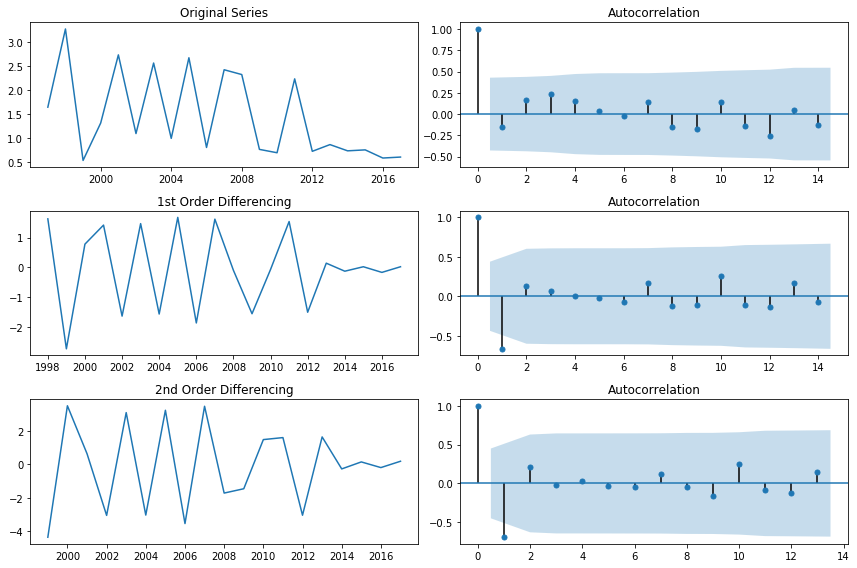

In [11]:
# Original Series
fig2, axes2 = plt.subplots(3, 2, figsize=(12, 8))
axes2[0,0].plot(br_na.deathRate); axes2[0,0].set_title('Original Series')
x2 = plot_acf(br_na.deathRate, axes2[0,1]);


# 1st Differencing
axes2[1,0].plot(br_na.deathRate.diff()); axes2[1,0].set_title('1st Order Differencing')
y2 = plot_acf(br_na.deathRate.diff().dropna(), axes2[1,1]);


# 2nd Differencing
axes2[2,0].plot(br_na.deathRate.diff().diff()); axes2[2,0].set_title('2nd Order Differencing')
z2 = plot_acf(br_na.deathRate.diff().diff().dropna(), axes2[2,1])


plt.tight_layout()

#### From the graphs above, we see that the Bronchitis data for North America is not stationary.  The time series reaches stationarity with two orders of differencing. 

### Central America

In [12]:
br_ca = bronchitis[bronchitis['Zone'] == "CentralAmerica"]
print("Bronchitis Central America df: ", br_ca.shape) #Size of the dataset
br_ca = br_ca.drop(['CountryName', 'ICD10', 'Class', 'Zone', 'Population', 'Deaths'], axis = 1)
br_ca = br_ca.groupby(['MortalityYear']).sum()
br_ca = br_ca.rename(columns={"Deaths(per_100000)": "deathRate"})
print(br_ca.info())
br_ca.head(5)

Bronchitis Central America df:  (408, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 1997-01-01 to 2018-01-01
Data columns (total 1 columns):
deathRate    22 non-null float64
dtypes: float64(1)
memory usage: 352.0 bytes
None


,deathRate
MortalityYear,
1997-01-01,6.22
1998-01-01,10.94
1999-01-01,11.23
2000-01-01,9.16
2001-01-01,8.18


In [13]:
#AdFuller test
result3 = adfuller(br_ca.deathRate.dropna())
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])

ADF Statistic: -0.207544
p-value: 0.937616


#### For Central America data, we need to further use differencing to make it stationary as the p-value is more than 0.05

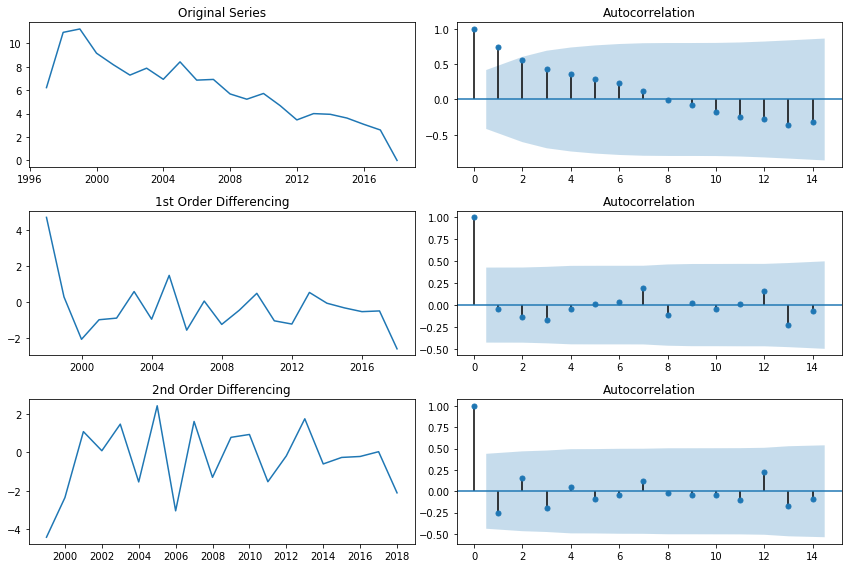

In [14]:
# Original Series
fig3, axes3 = plt.subplots(3, 2, figsize=(12, 8))
axes3[0,0].plot(br_ca.deathRate); axes3[0,0].set_title('Original Series')
x3 = plot_acf(br_ca.deathRate, axes3[0,1]);

# 1st Differencing
axes3[1,0].plot(br_ca.deathRate.diff()); axes3[1,0].set_title('1st Order Differencing')
y3 = plot_acf(br_ca.deathRate.diff().dropna(), axes3[1,1]);


# 2nd Differencing
axes3[2,0].plot(br_ca.deathRate.diff().diff()); axes3[2,0].set_title('2nd Order Differencing')
z3 = plot_acf(br_ca.deathRate.diff().diff().dropna(), axes3[2,1])


plt.tight_layout()

#### From the graphs above, we see that the Bronchitis data for Central America is also not stationary. The time series reaches stationarity with two orders of differencing.

### South America

In [15]:
br_sa = bronchitis[bronchitis['Zone'] == "SouthAmerica"]
print("Bronchitis Central America df: ", br_sa.shape) #Size of the dataset
br_sa = br_sa.drop(['CountryName', 'ICD10', 'Class', 'Zone', 'Population', 'Deaths'], axis = 1)
br_sa = br_sa.groupby(['MortalityYear']).sum()
br_sa = br_sa.rename(columns={"Deaths(per_100000)": "deathRate"})
print(br_sa.info())
br_sa.head(5)

Bronchitis Central America df:  (706, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 1995-01-01 to 2017-01-01
Data columns (total 1 columns):
deathRate    23 non-null float64
dtypes: float64(1)
memory usage: 368.0 bytes
None


,deathRate
MortalityYear,
1995-01-01,0.82
1996-01-01,3.53
1997-01-01,13.76
1998-01-01,14.53
1999-01-01,14.74


In [16]:
#AdFuller test
result4 = adfuller(br_sa.deathRate.dropna())
print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])

ADF Statistic: -1.266085
p-value: 0.644542


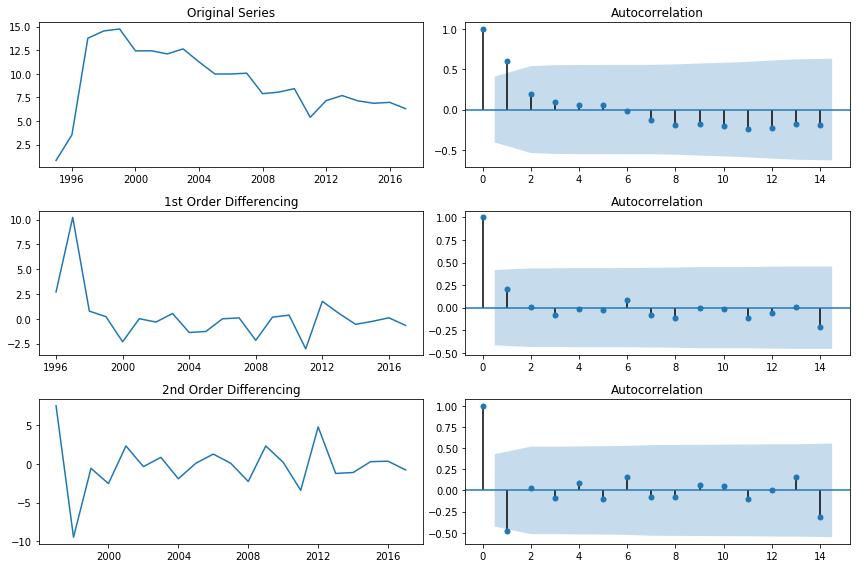

In [17]:
# Original Series
fig4, axes4 = plt.subplots(3, 2, figsize=(12, 8))
axes4[0,0].plot(br_sa.deathRate); axes4[0,0].set_title('Original Series')
x4 = plot_acf(br_sa.deathRate, axes4[0,1]);


# 1st Differencing
axes4[1,0].plot(br_sa.deathRate.diff()); axes4[1,0].set_title('1st Order Differencing')
y4 = plot_acf(br_sa.deathRate.diff().dropna(), axes4[1,1]);


# 2nd Differencing
axes4[2,0].plot(br_sa.deathRate.diff().diff()); axes4[2,0].set_title('2nd Order Differencing')
z4 = plot_acf(br_sa.deathRate.diff().diff().dropna(), axes4[2,1])


plt.tight_layout()

#### From the graphs above, we see that even the Bronchitis data for South America is not stationary. The time series reaches stationarity with two orders of differencing.